In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95% }</style>"))


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer

import tensorflow as tf
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

C:\Users\GUSTAVO\AppData\Local\Temp\ipykernel_8792\308346030.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Se analizará una Base de Datos de Kaggle, sobre información del Titanic

In [91]:
df = pd.read_csv(r"train.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
df.shape

(891, 11)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [94]:
name_DF = df['Name'].str.split(' ', expand=True)
del df["Name"]
df["Name"] = name_DF.iloc[:,1]

In [95]:
del df["Ticket"]
del df["Cabin"]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr.
2,1,1,female,38.0,1,0,71.2833,C,Mrs.
3,1,3,female,26.0,0,0,7.9250,S,Miss.
4,1,1,female,35.0,1,0,53.1000,S,Mrs.
5,0,3,male,35.0,0,0,8.0500,S,Mr.


In [96]:
df["Name"].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Gordon,           2
Col.              2
Mlle.             2
Major.            2
Melkebeke,        1
Jonkheer.         1
Shawah,           1
the               1
Velde,            1
Capt.             1
Messemaeker,      1
Carlo,            1
Ms.               1
Mme.              1
Steen,            1
Mulder,           1
Pelsmaeker,       1
Walle,            1
der               1
Billiard,         1
Don.              1
Cruyssen,         1
Name: Name, dtype: int64

In [97]:
name = []
for i in df["Name"]:
    if i == "Mr." or i == "Miss." or i == "Mrs." or i == "Master." or i == "Dr." or i == "Rev.":
        name.append(i)
    else:
        name.append("Otros")

In [98]:
del df["Name"]
df["Name"] = name

In [99]:
df["Parch_cat"]= np.where(df["Parch"] > 0, 1,0)
df["SibSp_cat"]= np.where(df["SibSp"] > 0, 1,0)
del df["SibSp"]
del df["Parch"]

In [100]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Name,Parch_cat,SibSp_cat
PassengerId,,,,,,,,,
1,0,3,male,22.0,7.2500,S,Mr.,0,1
2,1,1,female,38.0,71.2833,C,Mrs.,0,1
3,1,3,female,26.0,7.9250,S,Miss.,0,0
4,1,1,female,35.0,53.1000,S,Mrs.,0,1
5,0,3,male,35.0,8.0500,S,Mr.,0,0


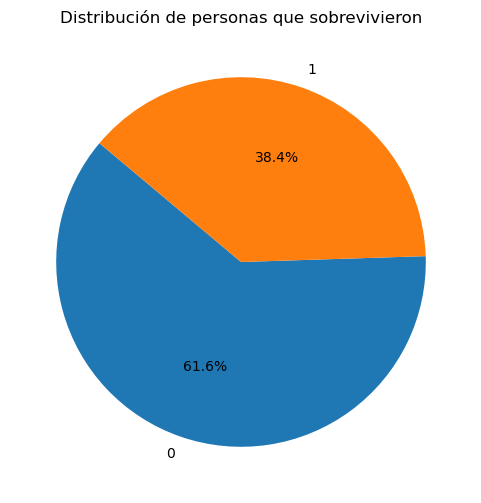

In [12]:
graf_1 = df["Survived"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(graf_1, labels=graf_1.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de personas que sobrevivieron')

plt.show()

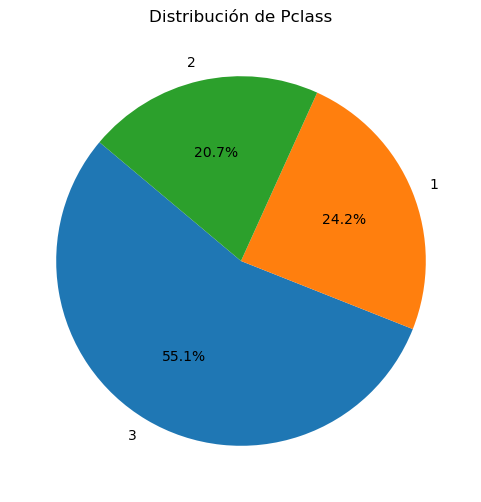

In [37]:
graf_2 = df["Pclass"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(graf_2, labels=graf_2.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de Pclass')

plt.show()

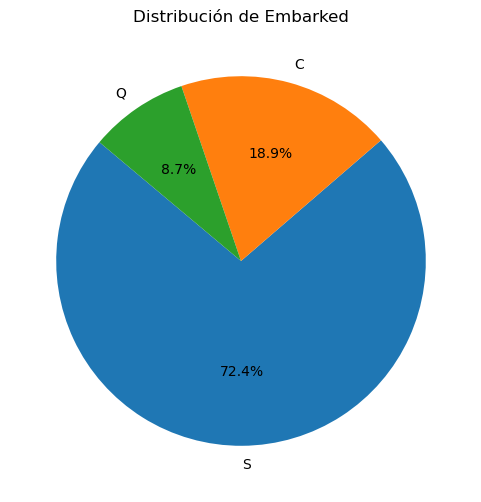

In [38]:
graf_3 = df["Embarked"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(graf_3, labels=graf_3.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de Embarked')

plt.show()

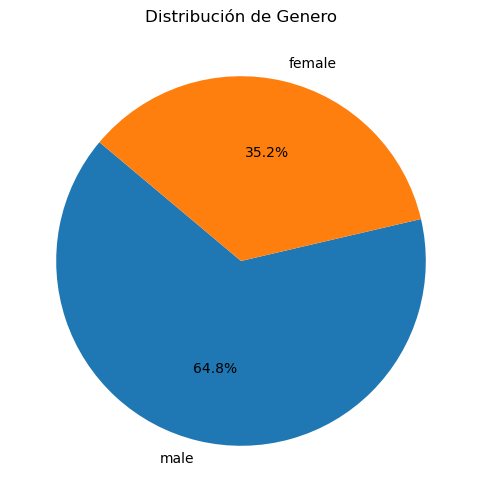

In [39]:
graf_4 = df["Sex"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(graf_4, labels=graf_4.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de Genero')

plt.show()

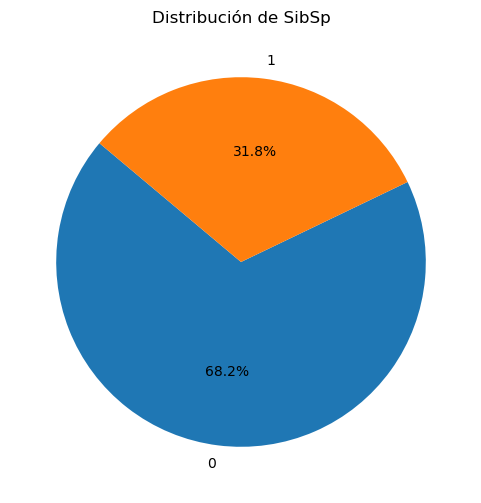

In [40]:
graf_5 = df["SibSp_cat"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(graf_5, labels=graf_5.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de SibSp')

plt.show()

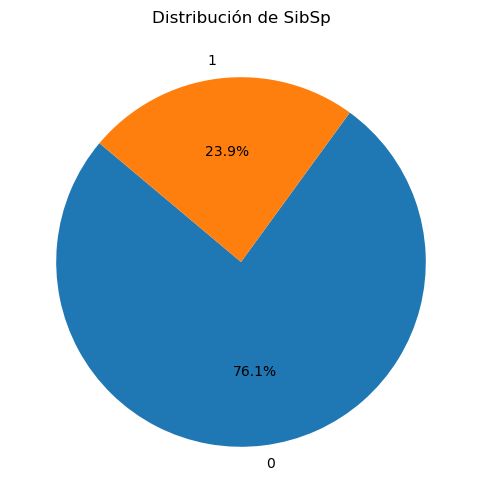

In [41]:
graf_6 = df["Parch_cat"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(graf_6, labels=graf_6.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de SibSp')

plt.show()

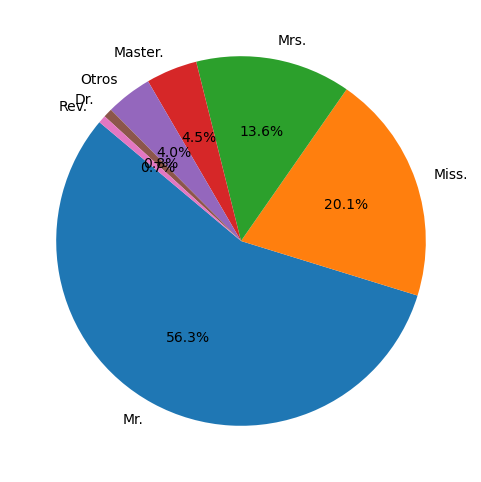

In [42]:
graf_7 = df["Name"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(graf_7, labels=graf_7.index, autopct='%1.1f%%', startangle=140)

plt.show()

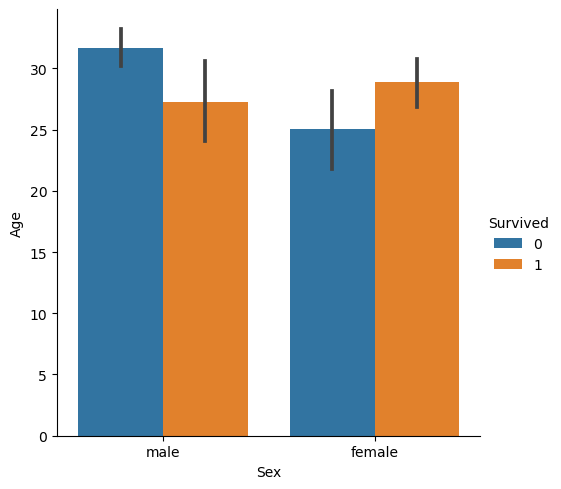

In [12]:
sns.catplot(x = "Sex", y = "Age", kind = "bar", data = df, hue="Survived")
plt.show()

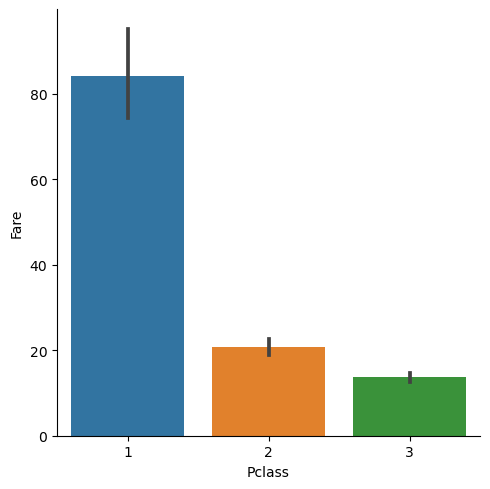

In [107]:
sns.catplot(x = "Pclass", y = "Fare", kind = "bar", data = df, hue="Survived")
plt.show()

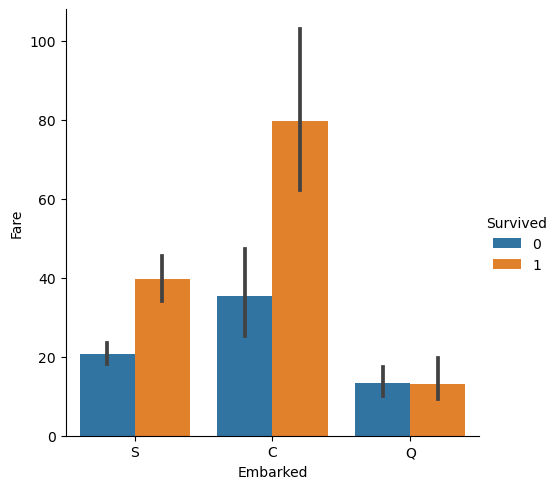

In [18]:
sns.catplot(x = "Embarked", y = "Fare", kind = "bar", data = df, hue="Survived")
plt.show()

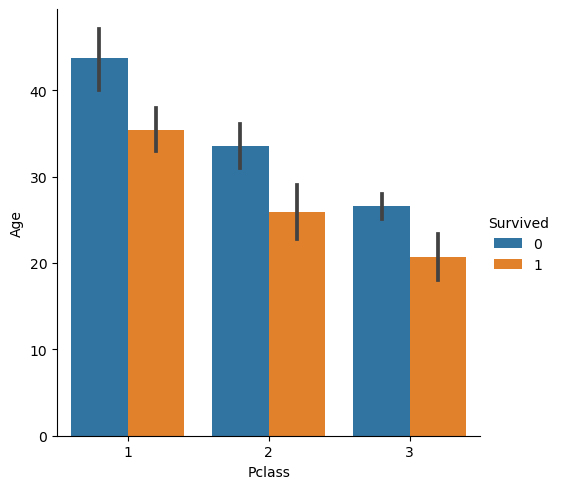

In [22]:
sns.catplot(x = "Pclass", y = "Age", kind = "bar", data = df, hue="Survived")
plt.show()

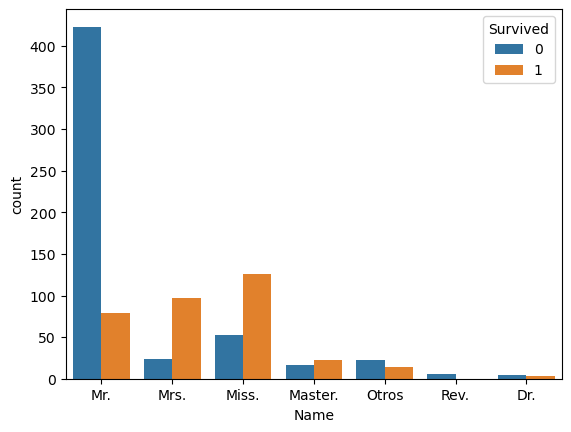

In [49]:
sns.countplot(x = "Name", data = df, hue="Survived")
plt.show()

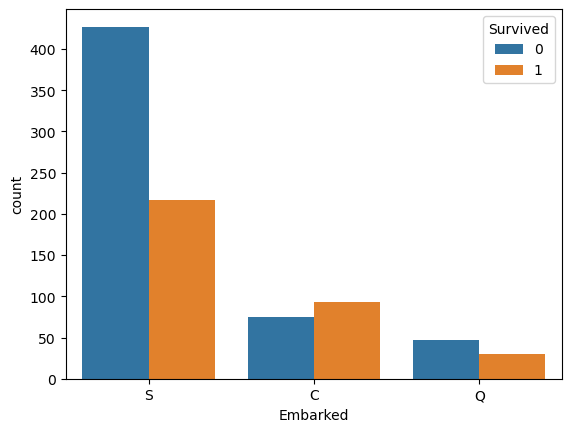

In [50]:
sns.countplot(x = "Embarked", data = df, hue="Survived")
plt.show()

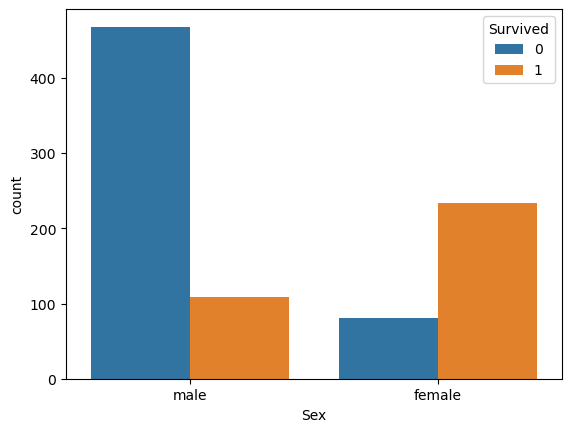

In [51]:
sns.countplot(x = "Sex", data = df, hue="Survived")
plt.show()

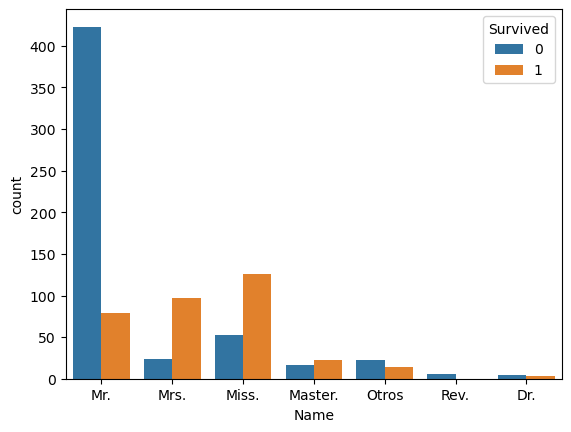

In [55]:
sns.countplot(x = "Name", data = df, hue="Survived")
plt.show()

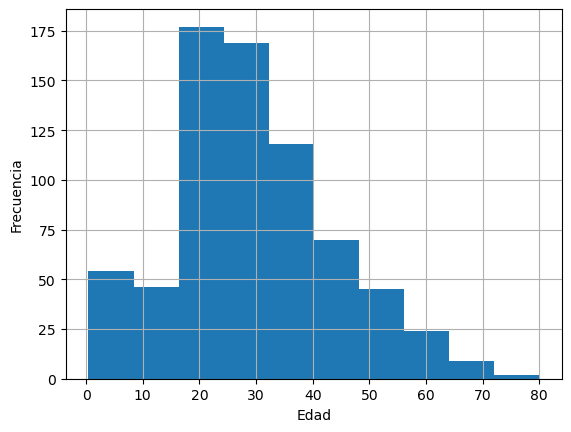

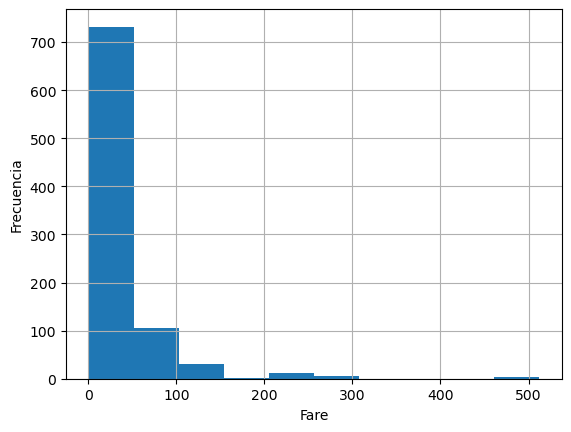

In [104]:
df["Age"].hist()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

df["Fare"].hist()
plt.xlabel("Fare")
plt.ylabel("Frecuencia")
plt.show()

In [105]:
df.describe()

,Survived,Pclass,Age,Fare,Parch_cat,SibSp_cat
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,0.239057,0.317621
std,0.486592,0.836071,14.526497,49.693429,0.426747,0.465813
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,28.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,38.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        714 non-null    float64
 4   Fare       891 non-null    float64
 5   Embarked   889 non-null    object 
 6   Name       891 non-null    object 
 7   Parch_cat  891 non-null    int32  
 8   SibSp_cat  891 non-null    int32  
dtypes: float64(2), int32(2), int64(2), object(3)
memory usage: 62.6+ KB


In [13]:
df = pd.get_dummies(df, columns=["Pclass", "Sex", "Embarked", "Name"], 
                      prefix=["Pclass", "Sex", "Embarked", "Name"])
df

,Survived,Age,Fare,Parch_cat,SibSp_cat,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Dr.,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Otros,Name_Rev.
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
2,1,38.0,71.2833,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,1,26.0,7.9250,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
4,1,35.0,53.1000,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
5,0,35.0,8.0500,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,13.0000,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
888,1,19.0,30.0000,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
889,0,NaN,23.4500,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0


In [14]:
del df["Pclass_2"]
del df["Sex_female"]
del df["Embarked_Q"]
del df["Name_Rev."]

In [15]:
y = df[["Survived"]]
del df["Survived"]

In [16]:
# Instanciar el imputador de k-NN
knn_imputer = KNNImputer()

# Imputar los valores faltantes en el DataFrame con variables numéricas
df = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
df.head()

,Age,Fare,Parch_cat,SibSp_cat,Pclass_1,Pclass_3,Sex_male,Embarked_C,Embarked_S,Name_Dr.,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Otros
0,22.0,7.2500,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38.0,71.2833,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,26.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,35.0,53.1000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,35.0,8.0500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
df.index = y.index
df_concat = pd.concat([y, df], axis=1)

In [20]:
df2 = df_concat.copy()

## Fase de modelado

In [21]:
Y_train = df_concat[["Survived"]]
del df_concat["Survived"]
X_train = df_concat

In [22]:
scoring = 'accuracy'

# Creamos algoritmos base
models = []
models.append(('LR', LogisticRegression()))
models.append(('CB', CatBoostClassifier(random_state=7, verbose=False)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=7)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=7)))

In [66]:
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

LR: 81.71%
CB: 83.05%
LDA: 80.02%
KNN: 71.50%
CART: 76.32%
NB: 77.44%
SVM: 67.01%


In [23]:
pipelines = []
pipelines.append(('ScaledLoR', Pipeline([('Scaler', StandardScaler()),('CB', LogisticRegression())])))
pipelines.append(('ScaledCB', Pipeline([('Scaler', StandardScaler()),('LR', CatBoostClassifier(random_state=7, verbose=False))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaledk-NN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier(random_state=7))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(random_state=7))])))
results = []
names = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

ScaledLoR: 81.04%
ScaledCB: 83.05%
ScaledLDA: 80.02%
Scaledk-NN: 79.35%
ScaledCART: 76.32%
ScaledNB: 77.44%
ScaledSVC: 80.92%


In [24]:
ss = StandardScaler()
ajuste = ss.fit(X_train)
X_train = ajuste.transform(X_train)

## Optimizamos los Modelos

In [47]:
# Modificamos los Hiperparametros de CatBoost, ya que fue uno de los que nos dió mejor resultado.

iterations = np.array([500,1000,2000])
learning_rate = np.array([0.01, 0.1,0.01])
depth = np.array([2,3,4])
loss_function = np.array(['Logloss', 'CrossEntropy'])

param_grid = dict(iterations=iterations, learning_rate=learning_rate, depth=depth, loss_function=loss_function)

model = CatBoostClassifier(random_state=7, verbose=False)

grid_CBC = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid_CBC.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.835007 using {'depth': 4, 'iterations': 1000, 'learning_rate': 0.01, 'loss_function': 'Logloss'}


In [48]:
CBC = grid_CBC.best_estimator_
ypred_CBC = CBC.predict(X_train)
print(classification_report(Y_train, ypred_CBC))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       549
           1       0.89      0.78      0.83       342

    accuracy                           0.88       891
   macro avg       0.88      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891



In [49]:
# Modificamos los Hiperparametros de SVC, ya que fue uno de los que nos dió mejor resultado.

c_values = np.array([0.001,0.1,1,10])
kernel_values = np.array(["rbf", "linear"])
gamma = np.array(['auto','scale'])

param_grid = dict(C=c_values, kernel=kernel_values, gamma=gamma)

model = SVC(random_state=7)

grid_SVC = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid_SVC.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.809227 using {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [50]:
SVC = grid_SVC.best_estimator_
ypred_SVC = SVC.predict(X_train)
print(classification_report(Y_train, ypred_SVC))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       549
           1       0.90      0.72      0.80       342

    accuracy                           0.86       891
   macro avg       0.87      0.83      0.84       891
weighted avg       0.86      0.86      0.86       891



## Algoritmos Ensamblados

In [51]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier(random_state=7)))
ensembles.append(('GBM', GradientBoostingClassifier(random_state=7)))
ensembles.append(('RF', RandomForestClassifier(random_state=7)))
ensembles.append(('ET', ExtraTreesClassifier(random_state=7)))
results = []
names = []
for name, model in ensembles:
    cv_results = cross_val_score(model, X_train, Y_train, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}%")

AB: 81.48%
GBM: 83.17%
RF: 79.69%
ET: 79.01%


## Optimizamos los Modelos Ensamblados

In [52]:
# Modificamos los Hiperparametros de RandomForestClassifier, ya que fue uno de los que nos dió mejor resultado.

n_estimators = np.array([100,250,300,400])
criterion = np.array(["gini", "entropy", "log_loss"])
max_depth = np.array([3,4,5,6])
max_features = np.array(["sqrt", "log2"])
                        
param_grid = dict(n_estimators=n_estimators, criterion=criterion, max_depth= max_depth, max_features=max_features)

model = RandomForestClassifier(random_state=7)

grid_RF = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid_RF.fit(X_train, Y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}") 

Best: 0.8249074132195092 using {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 300}


In [53]:
RFC = grid_RF.best_estimator_
ypred_RFC = RFC.predict(X_train)
print(classification_report(Y_train, ypred_RFC))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       549
           1       0.88      0.74      0.81       342

    accuracy                           0.86       891
   macro avg       0.87      0.84      0.85       891
weighted avg       0.87      0.86      0.86       891



In [56]:
# Modificando Hiperparametro de GradientBoostingRegressor
k_values = np.array([250,300,350,400])
loss = np.array(["log_loss", "deviance", "exponential"])
criterion = np.array([ "friedman_mse", "squared_error" ])
max_features = np.array([ "auto", "sqrt", "log2" ])

param_grid = dict(loss = loss, n_estimators=k_values, criterion=criterion)

model = GradientBoostingClassifier(random_state=7)

grid_GBC = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring)
grid_result = grid_GBC.fit(X_train, Y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}") 

Best: 0.8372795179210344 using {'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 250}


In [57]:
GBC = grid_GBC.best_estimator_
ypred_GBC = GBC.predict(X_train)
print(classification_report(Y_train, ypred_GBC))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       549
           1       0.95      0.87      0.91       342

    accuracy                           0.93       891
   macro avg       0.94      0.92      0.93       891
weighted avg       0.93      0.93      0.93       891



## XGBoost

In [67]:
import optuna

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 4),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'eta': trial.suggest_loguniform('eta', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'max_delta_step': trial.suggest_loguniform('max_delta_step', 1, 6),
        'min_child_weight': trial.suggest_loguniform('max_delta_step', 1, 2),
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, Y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_train)

    # Evaluate predictions
    accuracy = accuracy_score(Y_train, y_pred)
    return accuracy

In [68]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-07-31 20:13:32,833] A new study created in memory with name: no-name-88f7f6a3-c736-4eeb-94ab-a1ac997117dd
[I 2023-07-31 20:13:32,956] Trial 0 finished with value: 0.8686868686868687 and parameters: {'max_depth': 4, 'learning_rate': 0.2112021353144673, 'n_estimators': 280, 'min_child_weight': 1, 'gamma': 0.0022601620595060477, 'eta': 8.784673993483179e-08, 'subsample': 0.7483087402681768, 'colsample_bytree': 0.045064685984761696, 'reg_alpha': 0.05016873214673058, 'reg_lambda': 0.5289094212908614, 'max_delta_step': 3.9244014926282467}. Best is trial 0 with value: 0.8686868686868687.
[I 2023-07-31 20:13:33,024] Trial 1 finished with value: 0.877665544332211 and parameters: {'max_depth': 2, 'learning_rate': 0.6576813875225594, 'n_estimators': 228, 'min_child_weight': 5, 'gamma': 0.33477135637862077, 'eta': 0.08254627718214415, 'subsample': 0.39121783639777225, 'colsample_bytree': 0.2579866596241621, 'reg_alpha': 4.6312791140361395e-08, 'reg_lambda': 0.3868241431860624, 'max_delta_s

[I 2023-07-31 20:13:36,082] Trial 17 finished with value: 0.8641975308641975 and parameters: {'max_depth': 3, 'learning_rate': 0.2406064514125719, 'n_estimators': 569, 'min_child_weight': 4, 'gamma': 0.0007398141696356087, 'eta': 1.1535927206330385e-08, 'subsample': 0.4159538441367317, 'colsample_bytree': 0.12567634607000436, 'reg_alpha': 1.0099223392449892e-08, 'reg_lambda': 0.00028524895247586743, 'max_delta_step': 2.1578852760265423}. Best is trial 13 with value: 0.9191919191919192.
[I 2023-07-31 20:13:36,376] Trial 18 finished with value: 0.9158249158249159 and parameters: {'max_depth': 3, 'learning_rate': 0.11284953164359855, 'n_estimators': 762, 'min_child_weight': 1, 'gamma': 0.01517381070866274, 'eta': 1.115546540631632e-08, 'subsample': 0.9939245153237033, 'colsample_bytree': 0.3261901771434915, 'reg_alpha': 1.6231994623325662e-07, 'reg_lambda': 8.13590069563021e-05, 'max_delta_step': 2.218751105411229}. Best is trial 13 with value: 0.9191919191919192.
[I 2023-07-31 20:13:36,7

In [69]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 20
Best trial:
  Value: 0.9191919191919192
  Params: 
    max_depth: 3
    learning_rate: 0.41599546394217274
    n_estimators: 650
    min_child_weight: 4
    gamma: 2.7470632234100735e-05
    eta: 3.2215124496019816e-07
    subsample: 0.8425594025735899
    colsample_bytree: 0.14196032997361496
    reg_alpha: 3.888857037552809e-06
    reg_lambda: 0.035242747047669186
    max_delta_step: 1.8043471876561783


In [70]:
params = trial.params
XGBC = XGBClassifier(**params)
XGBC.fit(X_train, Y_train)
y_pred = XGBC.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_train, y_pred))

Accuracy after tuning: 90.24%
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       549
           1       0.90      0.84      0.87       342

    accuracy                           0.90       891
   macro avg       0.90      0.89      0.90       891
weighted avg       0.90      0.90      0.90       891



## Redes Neuronales

In [114]:
# Construir el modelo de Red Neuronal Feedforward (DNN)
model_tf = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.L2(0.01) ),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model_tf.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model_tf.fit(X_train, Y_train,epochs=2000, batch_size=32, verbose=False)

# Evaluar el modelo en el conjunto de prueba
_, accuracy = model_tf.evaluate(X_train, Y_train)
print("Accuracy en el conjunto de prueba:", accuracy)

# Hacer predicciones en el conjunto de prueba
y_pred_prob = model_tf.predict(X_train)
y_pred = np.round(y_pred_prob).flatten()

print("Informe de clasificación:")
print(classification_report(Y_train, y_pred))

28/28 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8698
Accuracy en el conjunto de prueba: 0.8698092103004456
28/28 [==============================] - 0s 1ms/step
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       549
           1       0.94      0.71      0.81       342

    accuracy                           0.87       891
   macro avg       0.89      0.84      0.85       891
weighted avg       0.88      0.87      0.87       891



## Realizamos el test para enviar las predicciones a Kaggle

In [27]:
# Evaluacion sobre el Test
test = pd.read_csv(r"C:\Users\GUSTAVO\Desktop\GustavoALL\Cursos\01_ Bases de datos para Practicar\Titanic\test.csv", index_col="PassengerId")
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [29]:
del test["Ticket"]
del test["Cabin"]

In [30]:
test["Parch_cat"]= np.where(test["Parch"] > 0, 1,0)
test["SibSp_cat"]= np.where(test["SibSp"] > 0, 1,0)
del test["SibSp"]
del test["Parch"]

In [31]:
name_DF2 = test['Name'].str.split(' ', expand=True)
del test["Name"]
test["Name"] = name_DF2.iloc[:,1]

In [32]:
name2 = []
for i in test["Name"]:
    if i == "Mr." or i == "Miss." or i == "Mrs." or i == "Master." or i == "Dr." or i == "Rev.":
        name2.append(i)
    else:
        name2.append("Otros")

In [33]:
del test["Name"]
test["Name"] = name2

In [34]:
test = pd.get_dummies(test, columns=["Pclass", "Sex", "Embarked", "Name"], 
                      prefix=["Pclass", "Sex", "Embarked", "Name"])
test.head()

,Age,Fare,Parch_cat,SibSp_cat,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_Dr.,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Otros,Name_Rev.
PassengerId,,,,,,,,,,,,,,,,,,,
892,34.5,7.8292,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
893,47.0,7.0000,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0
894,62.0,9.6875,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0
895,27.0,8.6625,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
896,22.0,12.2875,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0


In [35]:
del test["Pclass_2"]
del test["Sex_female"]
del test["Embarked_Q"]
del test["Name_Rev."]

In [36]:
test.isnull().sum()

Age             86
Fare             1
Parch_cat        0
SibSp_cat        0
Pclass_1         0
Pclass_3         0
Sex_male         0
Embarked_C       0
Embarked_S       0
Name_Dr.         0
Name_Master.     0
Name_Miss.       0
Name_Mr.         0
Name_Mrs.        0
Name_Otros       0
dtype: int64

In [37]:
test_index = test.index

In [38]:
# Imputar los valores faltantes en el DataFrame con variables numéricas
test = pd.DataFrame(knn_imputer.fit_transform(test), columns=test.columns)
test.head()

,Age,Fare,Parch_cat,SibSp_cat,Pclass_1,Pclass_3,Sex_male,Embarked_C,Embarked_S,Name_Dr.,Name_Master.,Name_Miss.,Name_Mr.,Name_Mrs.,Name_Otros
0,34.5,7.8292,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,47.0,7.0000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,62.0,9.6875,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,27.0,8.6625,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,22.0,12.2875,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
test.isnull().sum()

Age             0
Fare            0
Parch_cat       0
SibSp_cat       0
Pclass_1        0
Pclass_3        0
Sex_male        0
Embarked_C      0
Embarked_S      0
Name_Dr.        0
Name_Master.    0
Name_Miss.      0
Name_Mr.        0
Name_Mrs.       0
Name_Otros      0
dtype: int64

In [40]:
Scaled_test = ajuste.transform(test)

In [116]:
#prediccion de survived
y_pred_test = model_tf.predict(Scaled_test)

14/14 [==============================] - 0s 1ms/step


In [117]:
y_pred_test = np.round(y_pred_test).flatten()

In [118]:
y_pred_test.sum()

126.0

In [119]:
#Exportamos nuestros datos
predicciones = pd.DataFrame()
predicciones["PassengerId"] = test_index
predicciones["Survived"] = y_pred_test
predicciones.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [120]:
predicciones["Survived"] = predicciones["Survived"].astype("int64")

In [121]:
predicciones.to_csv("Gustavo_TITANIC.csv", index=False)

## Los resultados de los modelos para test son:

1. CatBoost = 78.47%
2. SVC = 78.95%
3. RandomForest = 77.99%
4. GradientBoosting = 76.56%
5. XGBoost = 75.36%
6. Sequential = 78.47%

**MUCHAS GRACIAS**